In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prophet libs
import prophet

## 1. Loading data

In [2]:
# Fixing csv file
with open("data/air_quality_sensor_data.csv", "r") as f:
    text = ''.join([i for i in f]).replace(";", ",")

with open("data/air_quality_sensor_data.csv", "w") as f:
    f.writelines(text)

In [3]:
# Loading data
df = pd.read_csv("data/air_quality_sensor_data.csv", index_col=0)
print(df.shape)
df.head()

(360, 3)


,PM1,PM10,PM25
Timestamp,,,
2021-11-11 14:04:03,10,36.016907,29.994762
2021-11-11 16:04:03,10,39.262622,29.965451
2021-11-11 18:04:03,10,40.017659,29.963461
2021-11-11 20:04:03,10,43.428453,29.999926
2021-11-11 22:04:03,10,44.946480,29.992089


In [4]:
# Removing unnecessary data (Only predicting PM10)
df = df.drop(["PM1", "PM25"], axis=1)
df.head()

,PM10
Timestamp,
2021-11-11 14:04:03,36.016907
2021-11-11 16:04:03,39.262622
2021-11-11 18:04:03,40.017659
2021-11-11 20:04:03,43.428453
2021-11-11 22:04:03,44.946480


<AxesSubplot:xlabel='Timestamp'>

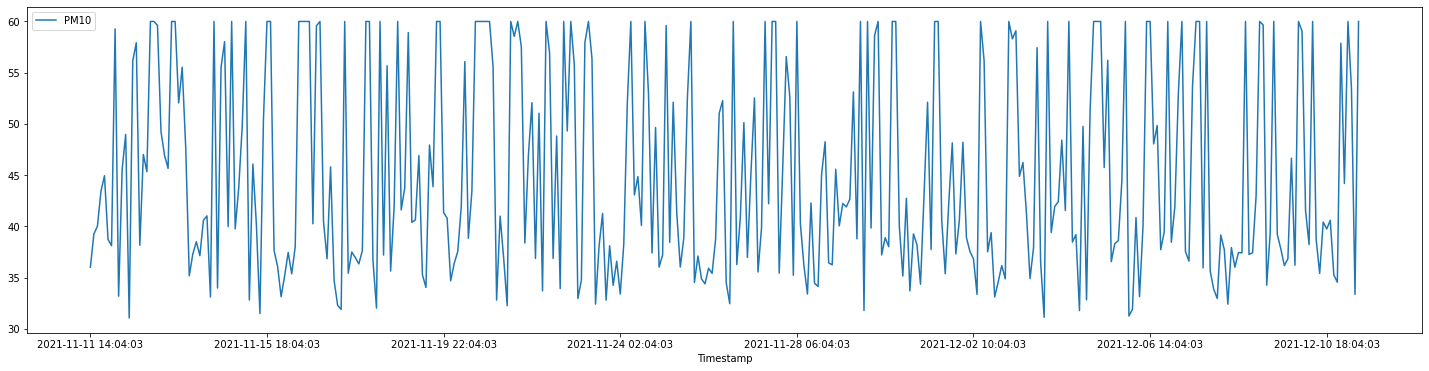

In [12]:
# Plotting data
plt.rcParams['figure.figsize'] = [25, 6]
df.plot()

## 2. Prophet Model